In [1]:
import matplotlib.pyplot as plt
import numpy as np
matrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
matrix2 = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]])


In [2]:
from qcodes.instrument_drivers.Abaco.AbacoDac import AbacoDAC

/anaconda3/envs/qcodes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
AbacoDAC.create_dat_file(data)

10240
10240
The waveform file was written


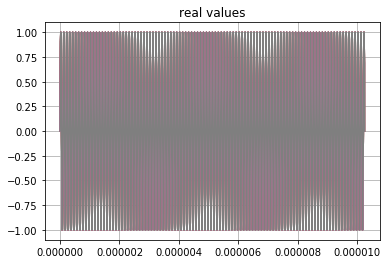

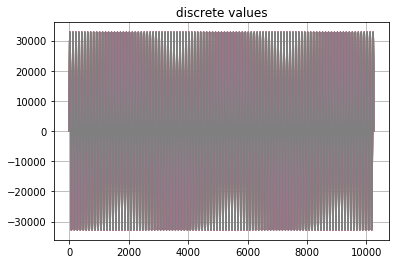

In [15]:
c_16B2CMAX = 32767  # Max value for 16b two's complement data

numChannels = 8     # the number of channels
sizeBlock = 10240      # the length of one waveform block
numBlocks = 1       # the number of  waveform blocks per channel
totalLenSamples = numBlocks*sizeBlock  # the total length of the waveform in a channel

print( totalLenSamples )
fsample = 1e9       # sampling rate
dt = 1/fsample   # sampling period

tD = np.arange(0, sizeBlock, 1)  # time vector for the discrete waves
t = np.arange(0, dt*sizeBlock, dt)
print(len(t))

f = np.array([1e7, 1e7, 1e7, 1e7, 1e7, 1e7,1e7, 1e7])

waves = np.zeros((numChannels, sizeBlock))
wavesD = np.zeros((numChannels, sizeBlock), dtype=np.int)  # discrete values


for ii in range(0, numChannels):
    waves[ii, :] = np.sin(2*np.pi*f[ii]*t)


# forcing the last sample to zero
waves[:, sizeBlock - 1] = 0

# creating quantized signals
wavesD = np.fix(c_16B2CMAX*waves)

plt.grid(True)
for ii in range(0, numChannels):
    plt.plot(t, waves[ii, :])

plt.title('real values')

plt.figure()
for ii in range(0, numChannels):
    plt.plot(tD, wavesD[ii, :])
plt.grid(True)
plt.title('discrete values')



# save to file
if 1:
    f = open('single_block_sine_v2_zero_end_.txt', 'w')    # file name
    f.write(str(numBlocks) + '\n')              # number of the waveform blocks in one channel
    for ii in range(0, numChannels):
        f.write(str(totalLenSamples) + '\n')        # the total lenght of a waveform per channel

    # interleave data samples
    wavesInterleaved = np.zeros((totalLenSamples * numChannels, ), dtype=np.int)  # interleaved data
    count = 0
    for ii in range(0, totalLenSamples):
        for jj in range(0, numChannels):
            #print(count)
            wavesInterleaved[count] = wavesD[jj, ii]
            count +=1



    for ii in range(0,totalLenSamples * numChannels):
        f.write(str(wavesInterleaved[ii]) + '\n')  # write interleaved samples

    f.close()
    print('The waveform file was written')

plt.show()



In [16]:
1.7/2

0.85

In [17]:
1.7/2**16

2.593994140625e-05

In [18]:
"About 26 uV per step"

'About 26 uV per step'

In [22]:
26e-6*6139

0.15961399999999998

In [24]:
0.85/2**16 * c_16B2CMAX

0.4249870300292969

In [25]:
32767*2

65534

In [50]:
V_PP_DC = 1.7

def twos_complement_val(voltage, Vpp = V_PP_DC):
    if not -Vpp/2 <= voltage <= Vpp/2:
        raise TypeError(f'Allowed voltages are {-Vpp/2}V to {Vpp/2}V. ' 
                        f'Tried setting voltage to {voltage}V.')
    
    else:
        fl = (2**16-1)/Vpp * voltage 
        val = round(fl)
        
    return fl, val

In [51]:
twos_complement_val(0.87)

TypeError: Allowed voltages are -0.85V to 0.85V. Tried setting voltage to 0.87V.

In [3]:
AbacoDAC._makeTextDataFile(fs, 1)

NameError: name 'fs' is not defined